In [2]:
import h5py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [66]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/cali_gai_cor_results/GDP_pro_chunks_split_maskDivide.h5','r')
pro = f['running_ave_cor'].value
pro_err = f['running_ave_err'].value

n_pro=f['running_num_shots'].value.astype(float)
n_pro = n_pro.sum(1)[:,0]

In [56]:
f.keys()

[u'run101_0',
 u'run101_1',
 u'run102_0',
 u'run102_1',
 u'run102_2',
 u'run102_3',
 u'run103_0',
 u'run103_1',
 u'run111_0',
 u'run112_0',
 u'run112_1',
 u'run112_2',
 u'run114_0',
 u'run114_1',
 u'run115_0',
 u'run115_1',
 u'run115_2',
 u'run115_3',
 u'run115_4',
 u'run115_5',
 u'run115_6',
 u'run116_0',
 u'run116_1',
 u'running_ave_cor',
 u'running_ave_err',
 u'running_num_shots']

In [57]:
f['running_num_shots'].value.mean(-1).sum(-1)

array([  32529.,   65058.,   97587.,  130116.,  162645.,  195174.,
        227703.,  260232.,  292761.,  325290.,  357819.,  390348.,
        422877.,  455406.,  487935.,  520464.,  552993.,  585522.,
        618051.,  650580.])

In [58]:
x = f['run111_0']['ave_cor_byChunk'].value
e = f['run111_0']['err_byChunk'].value
e2 = f['running_ave_err'].value
cpsi=np.load('/reg/neh/home/qiaoshen/run16_notebooks/encodeZ400_cpsi.npy')

In [43]:
x.shape
# e.shape
e2.shape
# 

(20, 36, 326)

(-2000000.0, 100000.0)

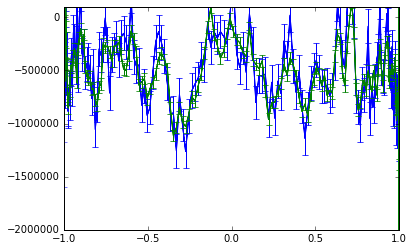

In [47]:
plt.errorbar(cpsi[0],x[10,1], yerr=e[10,1])
# plt.errorbar(cpsi[0],x[10,0], yerr=e[10,0])
plt.errorbar(cpsi[0],x[10,-1], yerr=e[10,-1])

plt.ylim(-2e6,1e5)

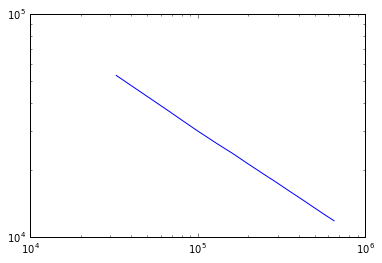

In [71]:
plt.loglog(n_pro,pro_err.mean(-1)[:,35])

In [72]:
from numpy import polyfit, polyval

In [73]:
x = np.log(n_pro)
y = np.log(pro_err.mean(-1)[:,35])

In [74]:
polyfit(x,y,deg=1)

array([ -0.49840599,  16.05336466])

In [83]:
snr= (pro-pro.min(-1)[:,:,None])/pro_err
x = np.log(n_pro)
y = np.log(snr.mean(-1)[:,35])

In [84]:
polyfit(x,y,deg=1)

array([ 0.41528461, -2.07381333])

In [79]:
pro_err.shape

(20, 36, 326)

In [81]:
snr.shape

(20, 36, 326)

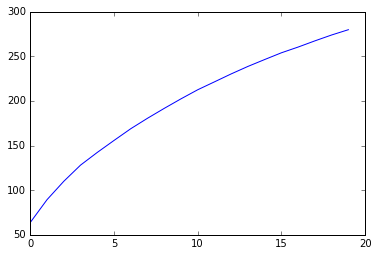

In [82]:
plt.plot(snr.mean(-1)[:,0])